#### 真实数据下的PCA

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [8]:
%%time
from sklearn.model_selection import train_test_split # 切分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

# 先使用KNN测试识别准确率
from sklearn.neighbors import KNeighborsClassifier #
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 16 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train) 
X_test_reduction = pca.transform(X_test) #必须使用训练数据集的pca,这样才能确定整个算法的准确度

In [11]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
knn_clf.score(X_test_reduction, y_test) #精度下降严重。刚开始有64个维度信息，现在只有2个

0.6066666666666667

In [13]:
pca.explained_variance_ratio_ #每一个轴可以解释的方差大小

array([0.14566817, 0.13735469])

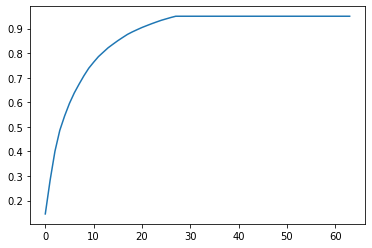

In [23]:
plt.plot([i for i in range(X_train.shape[1])],
         [np.sum(pca.explained_variance_ratio_[: i+1]) for i in range(X_train.shape[1])])
plt.show() #特征的数目对应方差的大小

In [26]:
pca = PCA(0.95) #要求特征数能解释95%以上的方差
pca.fit(X_train)
print(pca.n_components_) #能解释95%以上方差时的特征数

28


In [27]:
X_train_reduction = pca.transform(X_train) 
X_test_reduction = pca.transform(X_test) #必须使用训练数据集的pca,这样才能确定整个算法的准确度

In [28]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 5 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
knn_clf.score(X_test_reduction, y_test) #虽然比knn的准确率少了0.6%，但是时间上去了（用精度换时间）

0.98

In [33]:
#把特征降到2维也是有意义的
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)
X_reduction.shape

(1797, 2)

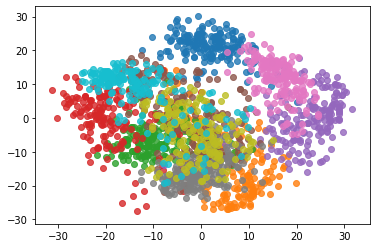

In [34]:
for i in range(10):
    plt.scatter(X_reduction[ y == i, 0], X_reduction[ y == i, 1], alpha=0.8)
plt.show() #可以看见，粉色数据和黄色数据在二维就可以区分了